In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



In [2]:
#convert an array of calues into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        if (dataset[i + look_back][0] != dataset[i][0]):
          continue
        a = dataset[i:(i + look_back), 1]
        dataX.append(a)
        dataY.append([dataset[i + look_back, 1]])
    return np.array(dataX), np.array(dataY)

#fix random seed for reproducibility
np.random.seed(7)




In [3]:
from google.colab import files
uploaded = files.upload()


Saving new planes.csv to new planes.csv


In [42]:
#load the dataset
dataframe = read_csv("new planes.csv", usecols=[0, 2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

#print(dataset)
print(dataset.shape)

#normalize the dataset
#scaler = MinMaxScaler(feature_range=(0,1))
#dataset = scaler.fit_transform(dataset)




(223349, 2)


In [44]:
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#normalize the dataset
#scaler = MinMaxScaler(feature_range=(0,1))
#trainX = scaler.fit_transform(trainX)
#trainY = scaler.fit_transform(trainY)
#testX = scaler.fit_transform(testX)
#testY = scaler.fit_transform(testY)




for i in range(0, 5):
  print(trainX[i], trainY[i])

#reshape input to be[ samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

[-9455. -9255. -9055. -8853. -8651.] [-8445.]
[-9255. -9055. -8853. -8651. -8445.] [-8231.]
[-9055. -8853. -8651. -8445. -8231.] [-8014.]
[-8853. -8651. -8445. -8231. -8014.] [-7800.]
[-8651. -8445. -8231. -8014. -7800.] [-7585.]


In [45]:
#create and fit the LSTM Network
n_steps = 5
n_features = 1
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=5, verbose=0)

In [46]:
batch_size = 1
#make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
#model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [ ]:
"""print(trainPredict.shape)
print(trainY.shape)
print(testPredict.shape)
print(trainY[:])
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])"""

Train Score: 778.27 RMSE
Test Score: 751.14 RMSE
(144347, 1)


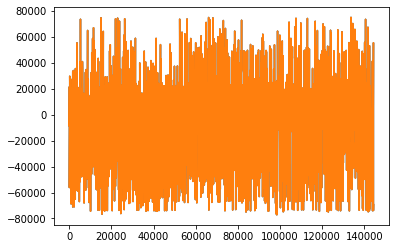

In [55]:
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:,0]))
print("Test Score: %.2f RMSE" % (testScore))

print(trainPredict.shape)

#shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#shift test predictions for plottting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1, :] = testPredict

#plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()